## 物体検出2：テンプレートマッチング


In [1]:
## メディア演習1 画像情報処理　0 まずは説明
## 画像のカメラからの取り込みとそのコピー
## まずはこれをよく理解すること

import numpy as np
import cv2
import matplotlib.pyplot as plt
import IPython
import time

In [2]:
# カメラオープン
cap = cv2.VideoCapture(0)

# カメラを使えない場合はこちら
# 自動ループしないので，ビデオが終了したあとはこのセルを再実行すること
# cap = cv2.VideoCapture("input.mp4")

In [3]:
## 結果・入力画像表示用の関数
## 必要に応じて書き換え
## 今回は基本的には書き換える必要はない

def update_disp(disp,image):
    _, enc = cv2.imencode(".jpg",image)
    disp.update(IPython.display.Image(data=enc.tobytes()))

## 何も表示しないためのプロセス
def zero(src, args=[]):
    return np.zeros(src.shape, dtype=np.uint8)

def image_show(process=zero, args=[]):
    ## 入力画像表示用ディスプレイ
    disp = IPython.display.display("Input",display_id=1)
    ## 結果画像表示用ディスプレイ
    disp2 = IPython.display.display("Result",display_id = 2)
    while cap.isOpened():
        try:
            ret, frame = cap.read()
            if ret is False:
                break
            # 入力画像と結果画像の表示を更新
            update_disp(disp,frame)
            update_disp(disp2, process(frame, args))
            time.sleep(1.0/30)

        except KeyboardInterrupt:
            break

## BGR を RGBに変換して表示
def imshow(plt, img):
    plt.imshow(img[:,:,::-1])

In [ ]:
## 画像表示のテスト
## 動画が表示されていればOK
## 適切に表示されない場合は，カメラの接続を確認すること．
## うまく表示されない場合の対処方法は，資料参照

image_show()

## 結果画像を表示させる場合は以下のように使う
## image_show(process, args)
## このとき，process は以下の形式を取る
## process(img, args) で結果画像を return
## 必ず2つの引数を持たなければならない，引数が不要の場合は以下のように初期値を与える（与えられない時，自動的にそれになる）
## process(img , args = [])
## 2つ以上の場合は，配列などで与える
## process(img, [theta, s, t]
## など．
## 以下の例で試してみること

'Input'

'Result'

NameError: name 'cap' is not defined

width = 640
height = 397
channels = 3


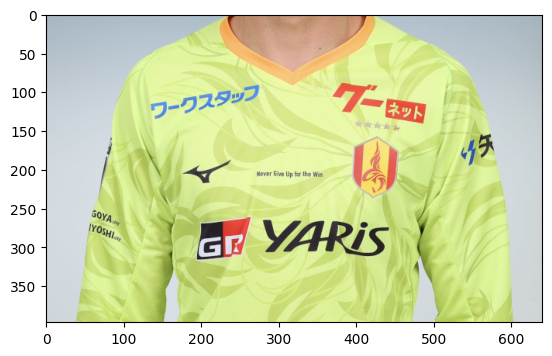

In [4]:
## 画像を１枚取り込んで表示する．
## ここまでは共通

## 画像は numpy 形式で保持される．
#ret, src = cap.read()
src = cv2.imread("mathing.jpg")
ret = src is not None
template = cv2.imread("template.jpg")
## 画像の読み込みが成功した場合は ret に True が代入される．
if (ret == True):
    imshow(plt,src)
    ## 画像サイズ等の情報は，src.shape に記録されている
    ## numpy は行列（等）を保持する形式のため，[行（高さ），列（幅），チャネル数] の順番で保存される
    ## また，チャネル数とは画像がカラー画像の場合は3，グレースケール画像の場合は1となる．
    ## 詳しくは講義資料等を確認すること
    print("width = %d" % src.shape[1])
    print("height = %d" % src.shape[0])
    print("channels = %d" % src.shape[2])
else:
    print("Image cannot be captured. Check camera connection")


### ここから課題

In [6]:
## 課題9
## すべての領域において入力画像とテンプレート画像の類似度を計算するプログラムを作成せよ
def compute_template_similarity(src, template):
    ## 類似度を格納するためのマップ
    sh, sw, sc = src.shape
    th, tw, tc = template.shape
    dst = np.zeros((sh - th + 1, sw - tw + 1), dtype=np.float32)

    ## 講義資料を確認し，それぞれの画素の類似度を計算せよ
    for y in range(sh - th + 1):
        for x in range(sw - tw + 1):
            patch = src[y : y + th, x : x + tw]
            diff = patch.astype(np.float32) - template.astype(np.float32)
            score = np.sum(np.abs(diff))
            dst[y, x] = score
    return dst

## template画像については適当に設定すること
## 例えば事前に取得した画像の一部を切り出すなど
smap = compute_template_similarity(src, template)



In [7]:
## 与えられたマップからモットモるいじした箇所を選択するプログラムを作成せよ
def find_minimum(smap):
    ## 類似度が最大の箇所を決定する
    minimum = np.unravel_index(np.argmin(smap), smap.shape)
    return minimum
    ##return 0, 0

処理時間: 5.246秒


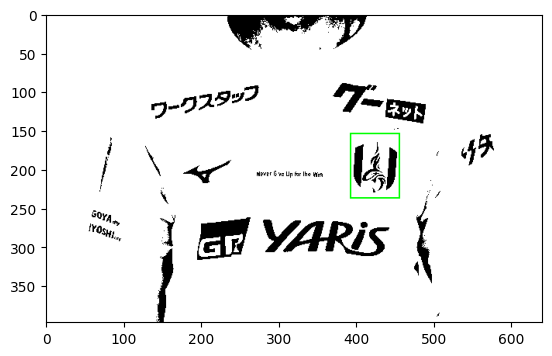

In [9]:
## これまでの関数を組み合わせて最も類似している箇所を表示するプログラムを作成せよ
## pythonの関数を用いて処理時間を計測し，テンプレートサイズ，入力画像のサイズと処理時間の関係を考察せよ

def draw_rectangle(dst, x, y, w, h, color=[0, 255, 0], thickness=2):
    for t in range(thickness):
        if y + t < dst.shape[0]:
            dst[y + t, x:x + w] = color
        if y + h - 1 - t < dst.shape[0]:
            dst[y + h - 1 - t, x:x + w] = color
        if x + t < dst.shape[1]:
            dst[y:y + h, x + t] = color
        if x + w - 1 - t < dst.shape[1]:
            dst[y:y + h, x + w - 1 - t] = color

def template_matching(img, template):
    ## これまでに使った関数を利用すること
    ## 結果画像，見つかった領域を枠で囲むなど，わかりやすい形で提示する．
    dst = np.zeros(img.shape, dtype = np.uint8)
    start = time.time()

    smap = compute_template_similarity(src, template)
    y, x = find_minimum(smap)

    dst = src.copy()
    h, w, _ = template.shape
    draw_rectangle(dst, x, y, w, h, color=[0, 255, 0], thickness = 2)
    #cv2.rectangle(dst, (x, y), (x + w, y + h), (0, 255, 0), 2)

    end = time.time()
    print("処理時間: {:.3f}秒".format(end - start))

    return dst


# 判別分析法
def calculate_thresh(src):
    gray = 0.299 * src[:, :, 2] + 0.587 * src[:, :, 1] + 0.114 * src[:, :, 0]
    gray = gray.astype(np.uint8)
    # ヒストグラムの計算
    hist, bins = np.histogram(gray, bins=256, range=(0, 256))
    total_pixels = gray.size
    max = 0
    thresh = 0
    sum_total = np.dot(hist, np.arange(256))
    sum_background = 0
    background = 0

    for t in range(256):
        background += hist[t]
        if background == 0:
            continue

        foreground = total_pixels - background
        if foreground == 0:
            break

        sum_background += t * hist[t]
        mean_background = sum_background / background
        mean_foreground = (sum_total - sum_background) / foreground

        # クラス間分散の計算
        variance_between = background * foreground * (mean_background - mean_foreground) ** 2

        # 最大のクラス間分散を記録
        if variance_between > max:
            max = variance_between
            thresh = t

    return thresh


# 二値化
def image_binarize_grayscale(src, args = [128.0]):
    thresh = args[0]
    dst = np.zeros(src.shape, dtype= np.uint8)
    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            gray = 0.299 * src[y, x, 2] + 0.587 * src[y, x, 1] + 0.114 * src[y, x, 0]
            if gray > thresh:
                dst[y, x] = [255, 255, 255]
            else:
                dst[y, x] = [0, 0, 0]
    return dst


def template_matching_gray(src, template):
    ## これまでに使った関数を利用すること
    ## 結果画像，見つかった領域を枠で囲むなど，わかりやすい形で提示する．
    thresh = calculate_thresh(src)
    src_bin = image_binarize_grayscale(src, [thresh])
    template_bin = image_binarize_grayscale(template, [thresh])

    dst = np.zeros(src_bin.shape, dtype = np.uint8)
    start = time.time()

    smap = compute_template_similarity(src_bin, template_bin)
    y, x = find_minimum(smap)

    dst = src_bin.copy()
    h, w, _ = template_bin.shape
    draw_rectangle(dst, x, y, w, h, color=[0, 255, 0], thickness = 2)

    end = time.time()
    print("処理時間: {:.3f}秒".format(end - start))

    return dst

dst = template_matching_gray(src, template)
imshow(plt, dst)
#cv2.imwrite('matching-result-gray.jpg', dst)

In [ ]:
## 発展課題１：高速テンプレートマッチング
## テンプレートマッチングの計算はフィルタリング処理により計算することが可能である．
## この性質を利用することで，FFTを用いた大幅な高速化が実現可能である．
## これを利用して実際に高速テンプレートマッチングを実装せよ．
## また，通常の方法と比べてどの程度の高速化が実現できるかを計測せよ．
## さらに，入力画像，テンプレート画像のサイズとの関係について考察せよ

def compute_template_similarity_FFT(src, args=[]):

    return smap

In [ ]:
## 発展課題２：スケール変換，回転に対応したテンプレートマッチング
## 高速化を活用することで，画像のスケール変換や回転にも対応可能なテンプレートマッチングが実用できる．
## これを実装せよ

def template_matching_trans(src, args=[])
    ## 回転については-30度から+30度までを30度刻みで変化させ
    ## スケールについては 0.8 - 1.2 までを 0.2 刻みで変化させること

    return
